In [1]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

import sys
sys.path.append("../../")

import numpy as np
from src.utils.visualize import plotMatrix

%matplotlib widget

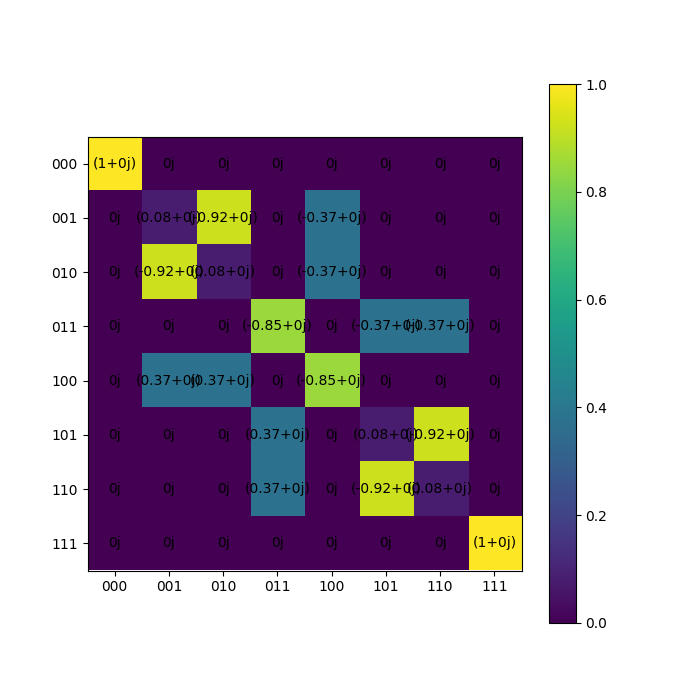

In [2]:
#using our same metrics as before using ratio of coupling strengths, investigate the relative costs of our 3Q gates
from src.hamiltonian import CirculatorHamiltonian
#v_nn = np.sqrt(2) * np.pi / np.arccos(1 / np.sqrt(3)) #w-state
v_nn = 4/np.sqrt(2) #1.5iswap
v_params = [np.pi / 2, np.pi / 2, 0, np.pi / v_nn, np.pi / v_nn, 0]
#v_params = [np.pi / 2, np.pi / 2, np.pi / 2, np.pi / v_nn, np.pi / v_nn, np.pi / v_nn]
_array = CirculatorHamiltonian.construct_U(*v_params,t=1.6442677715360021) #w-state
#_array = CirculatorHamiltonian.construct_U(*v_params,t=1) #completed DIV
plotMatrix(_array);

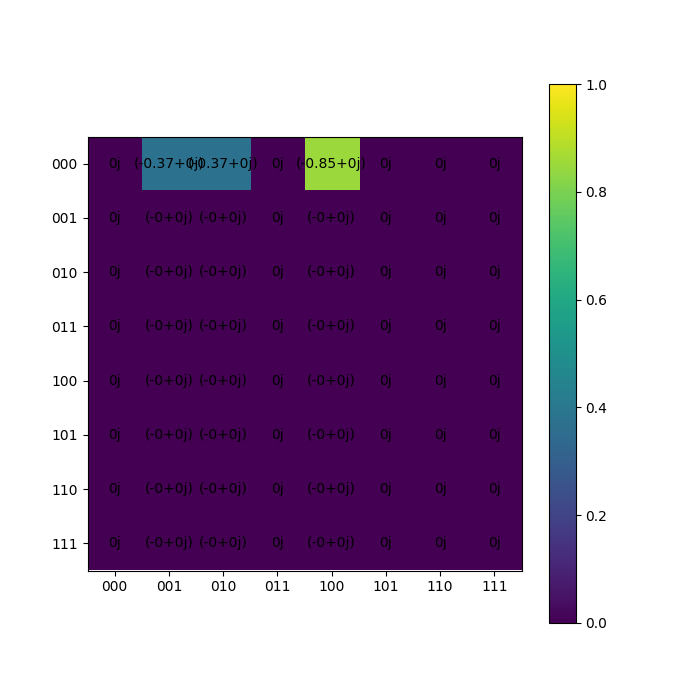

In [3]:
output_state = np.matmul(_array.full(),np.array([0,0,0,0,1,0,0,0]))
plotMatrix(output_state * [[1],[0],[0],[0],[0],[0],[0],[0]]);

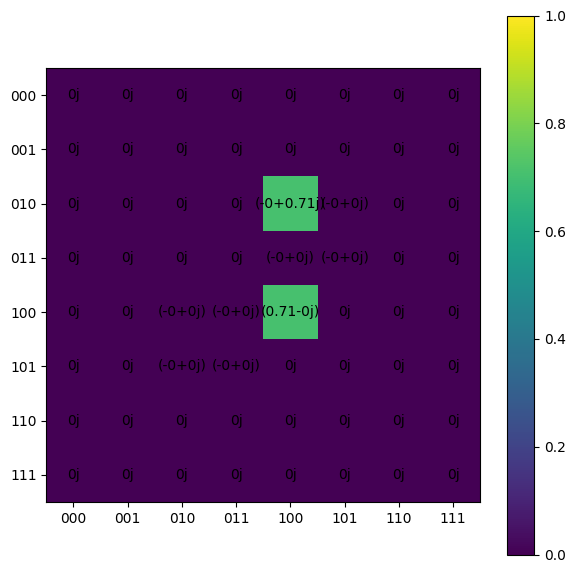

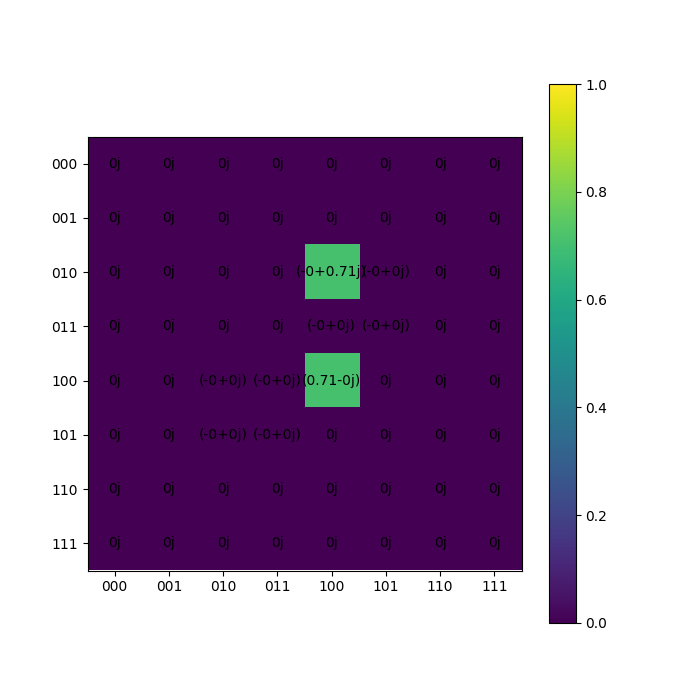

In [4]:
from qiskit.circuit.library.standard_gates import iSwapGate, IGate
from qiskit.quantum_info import Operator
s = Operator(iSwapGate().power(1/2)).tensor(Operator(IGate())).data * [0,0,0,0,1,0,0,0]
from qiskit import QuantumCircuit
qc = QuantumCircuit(3)
qc.append(iSwapGate(), [0,2])
s2 = Operator(qc).data * s
plotMatrix(s)

In [5]:
1.4142135623730951 * 0.6081734479693927

0.860087138393523

In [6]:
2/np.sqrt(2) * (np.pi/2) / (2*np.pi / v_nn)

1.0

In [7]:
#consider V-swap on |100> -> [|010> + |001>/sqrt(2)] 
#this is equivalent to 1.5 iswaps if use 2Q gates

#if we use the 3Q gate,
(2*np.pi / v_nn)/(np.pi/2) #t=2/sqrt(2) for distribute
#t=0.860087138393523 #for w-state

1.4142135623730951

In [11]:
import matplotlib.pyplot as plt

plt.style.use('science')
%matplotlib inline

final state: [0.0, 0.5000000000000001, 0.5000000000000001, 0.0, 0.0, 0.0, 0.0, 0.0]


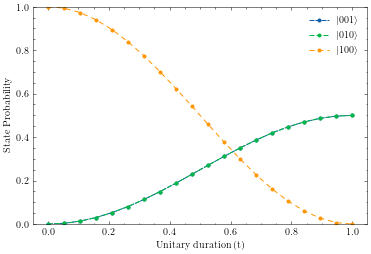

In [27]:
#make a plot that shows the state amplitude as a function of gate time
#use this plot to find input states and durations to build entangled states from the V and Delta -Swap Gates
v_nn = 4/np.sqrt(2) #1.5iswap
v_params = [np.pi / 2, np.pi / 2, 0, np.pi / v_nn, np.pi / v_nn, 0] #V-swap
#TODO represent states with complex values
def foo_plot(v_params, input_state):
    data = []
    t_range = np.linspace(0,1,20)
    for t_el in t_range:
        unitary = CirculatorHamiltonian.construct_U(*v_params,t=t_el)
        output_state = np.matmul(unitary.full(),np.array(input_state))
        data.append([np.abs(el)**2 for el in output_state])
    for s_index in range(len(data[0])):
        temp_data = np.array(data).T[s_index]
        if any([el > 0 for el in temp_data]): 
            plt.plot(t_range, temp_data, label=r"$|$" + f"{bin(s_index)[2:].zfill(3)}" + r"$\rangle$", marker='.', dashes=(5, s_index))
    plt.legend()
    plt.xlabel("Unitary duration (t)")
    plt.ylabel("State Probability")
    plt.ylim([0, 1])
    #plt.rcParams["figure.figsize"] = (12,8)
    print("final state:",data[-1])
foo_plot(v_params, [0,0,0,0,1,0,0,0])
#foo_plot(v_params, [0,0,0,0,0,0,1,0])

final state: [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]


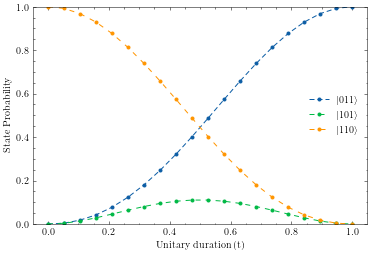

In [25]:
nn = 3 * np.sqrt(3) / 2
v_params = [np.pi / 2, -np.pi / 2, np.pi / 2, np.pi / nn, np.pi / nn, np.pi / nn]   #smiley
unitary = CirculatorHamiltonian.construct_U(*v_params,t=1)
# plotMatrix(unitary);
#foo_plot(v_params, [0,1/np.sqrt(2),0,1/np.sqrt(2),0,0,0,0])
foo_plot(v_params, [0,0,0,0,0,0,1,0])